In [4]:
import numpy as np
import sklearn.datasets as ds
import matplotlib.pyplot as plt 
import mdp
import tensorflow as tf
import scipy
from course_utils import *
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans



/home/hlynur/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/hlynur/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


28
(70000, 784)
(70000,)


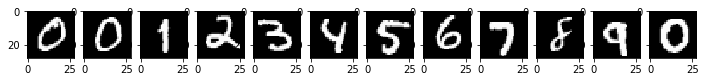

In [5]:
dataset = ds.fetch_mldata('MNIST original', data_home="./mnist")
XX, YY = dataset["data"].astype('float'), np.array(dataset["target"]).astype('float')
print(int(np.sqrt(XX.shape[1])))
dim1, dim2, dim3 = (int(np.sqrt(XX.shape[1])), int(np.sqrt(XX.shape[1])), 1)
rs_XX = np.reshape(XX, (XX.shape[0], from skimage.transform import rotate
from skimage.transform import rotate
dim1, dim2, dim3))
print(XX.shape)
print(YY.shape)

smaller_xx = rs_XX[:70000,:,:]
smaller_xx = smaller_xx[::70]
smaller_yy = YY[:70000]
smaller_yy = smaller_yy[::70]
n = smaller_xx.shape[0]
slow_features = 2


plt.figure(figsize=(12, 12))
for i in range(12):
    plt.subplot(1, 12, i+1)
    plt.imshow(rs_XX[int(i*5500),:].squeeze(), cmap="gray")
plt.show()

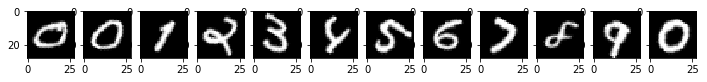

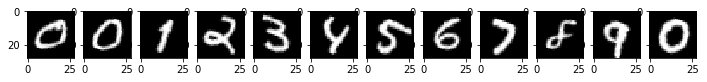

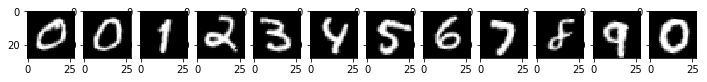

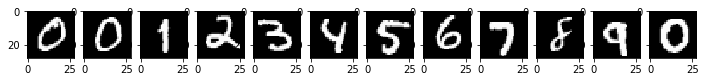

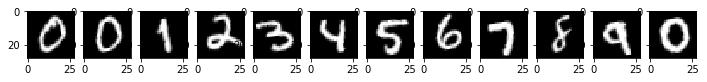

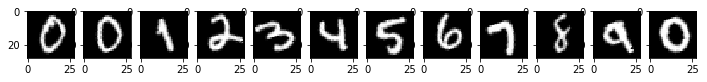

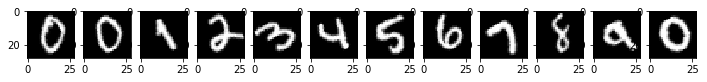

In [14]:
from skimage.transform import rotate
rotations = [-30, -20, -10, 0, 10, 20, 30]
for rot in rotations:
    plt.figure(figsize=(12, 12))
    for i in range(12):
        rotated_xx = rs_XX[int(i*5500),:].squeeze()
        rotated_xx = rotate(rotated_xx, rot)
        plt.subplot(1, 12, i+1)
        plt.imshow(rotated_xx, cmap="gray")
    plt.show()

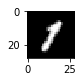

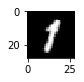

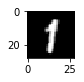

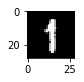

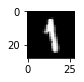

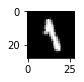

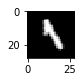

In [17]:
from skimage.transform import rotate
rotations = [-30, -20, -10, 0, 10, 20, 30]
for rot in rotations:
    plt.figure(figsize=(12, 12))
    rotated_xx = rs_XX[int(2*5500),:].squeeze()
    rotated_xx = rotate(rotated_xx, rot)
    plt.subplot(1, 12, i+1)
    plt.imshow(rotated_xx, cmap="gray")
    plt.show()

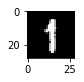

In [31]:
plt.figure(figsize=(12, 12))
rotated_xx = rs_XX[int(2*5500),:].squeeze()
rotated_xx = rotate(rotated_xx, 0)
plt.subplot(1, 12, i+1)
plt.imshow(rotated_xx, cmap="gray")
plt.show()


20, 31


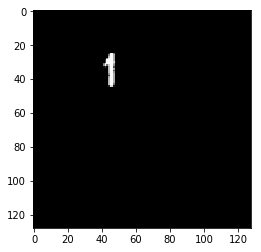

26, 35


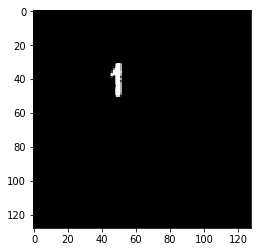

31, 40


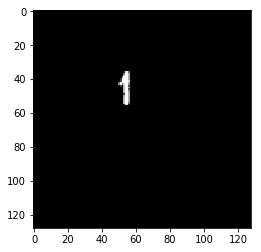

35, 46


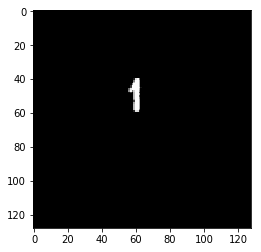

40, 51


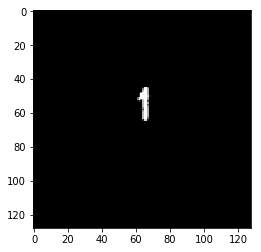

44, 57


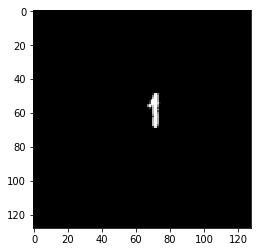

50, 61


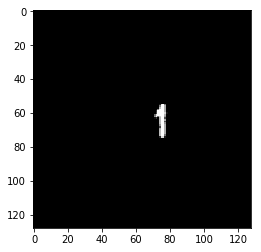

56, 65


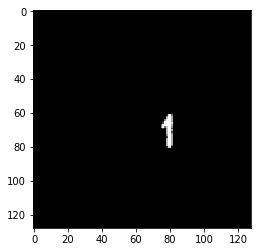

64, 67


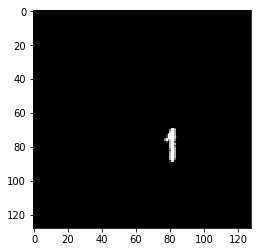

70, 71


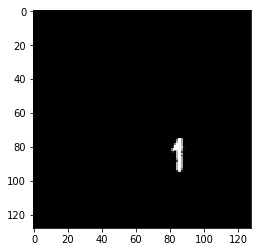

76, 75


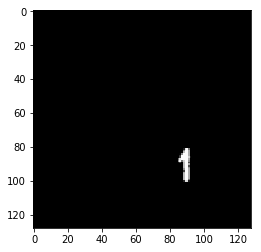

81, 80


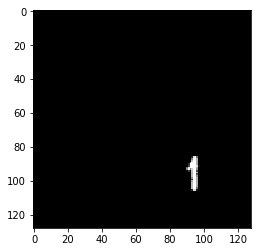

84, 87


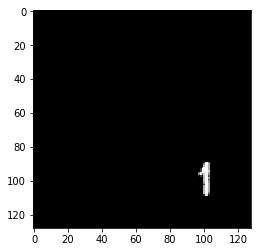

86, 95


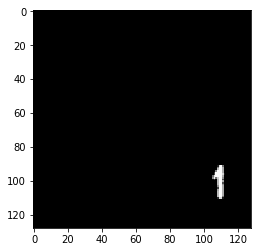

92, 99


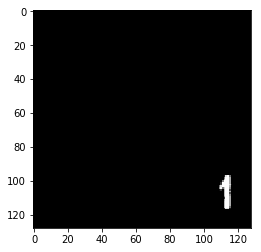

99, 98


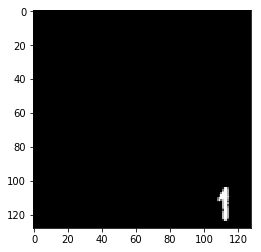

96, 93


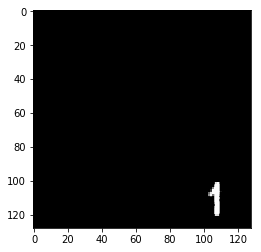

91, 88


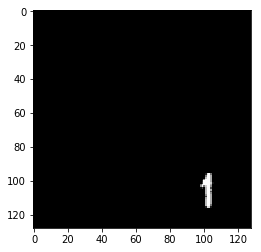

83, 86


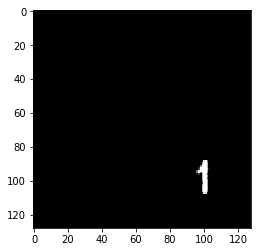

79, 80


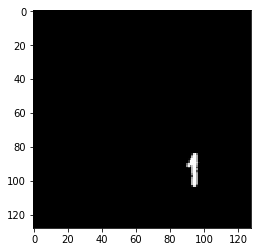

74, 75


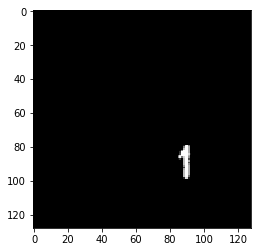

68, 71


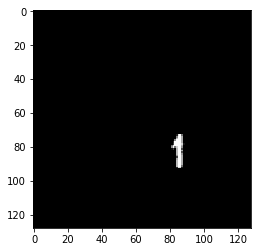

63, 66


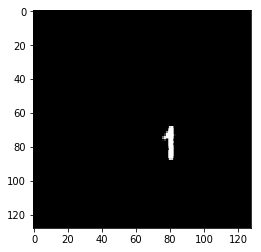

60, 59


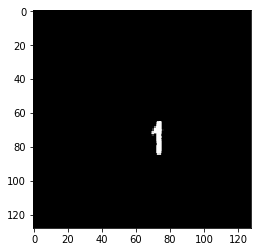

54, 55


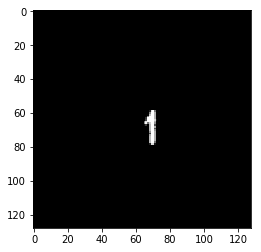

48, 51


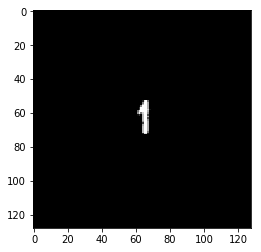

44, 45


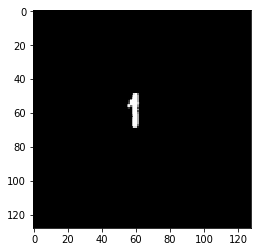

39, 40


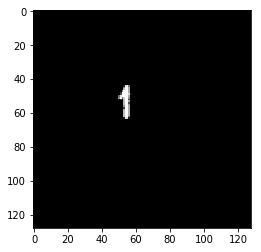

34, 35


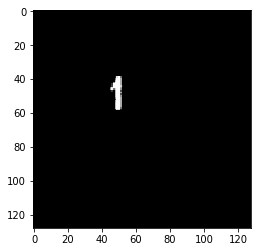

30, 29


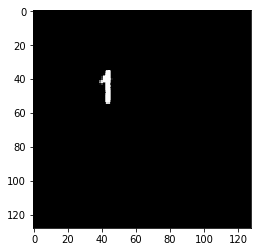

22, 27


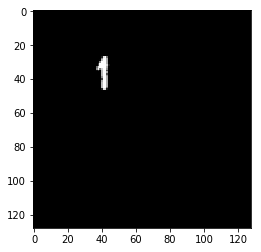

18, 21


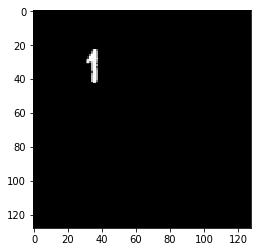

15, 14


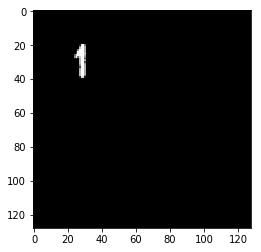

11, 8


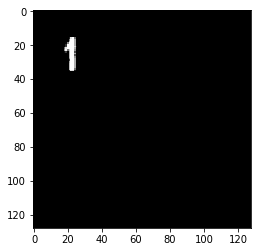

3, 6


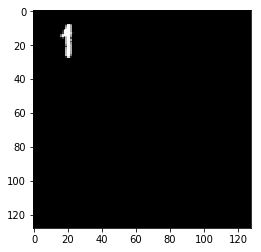

2, 1


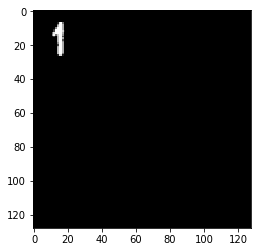

8, 3


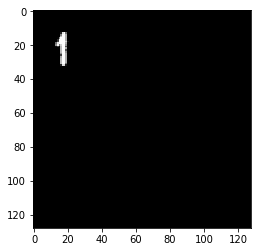

12, 9


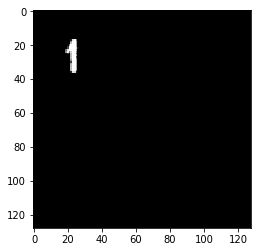

15, 16


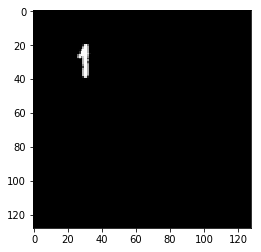

21, 20


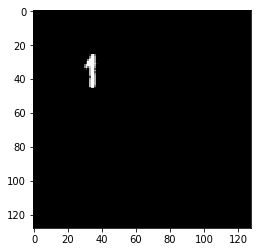

26, 25


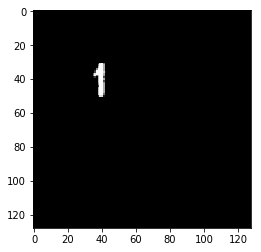

32, 29


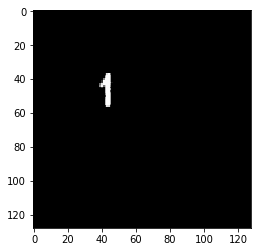

34, 37


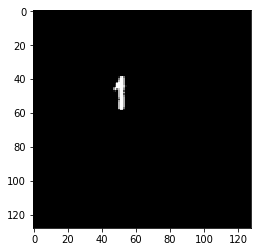

43, 38


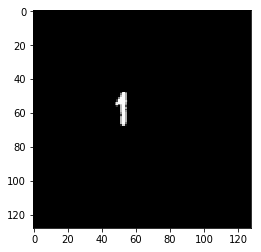

48, 43


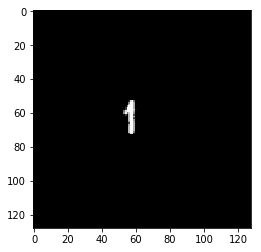

53, 48


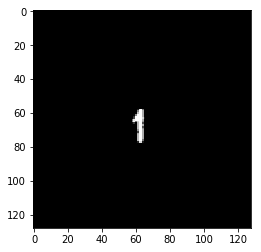

57, 54


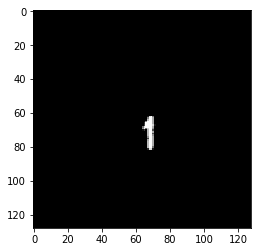

63, 58


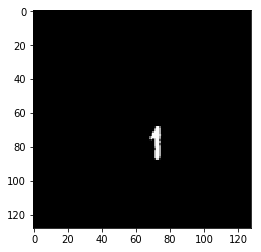

66, 65


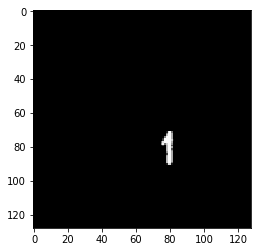

70, 71


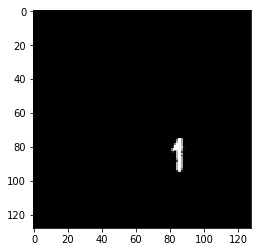

In [56]:
import random
o_dim1, o_dim2 = (rotated_xx.shape[0], rotated_xx.shape[1])
s_dim1, s_dim2 = (128, 128)
x_pos = 20
y_pos = 30
x_prev_delta, y_prev_delta = (0, 0)
for i in range(500):
    if random.random() < 0.5:
        x_delta = 1 if random.random() < 0.5 + x_prev_delta*0.5  else -1
        x_prev_delta = x_delta
        x_pos = max(0, min(x_delta+x_pos, s_dim1-o_dim1))
        if x_pos == 0 or x_pos == s_dim1 - o_dim1:
            x_prev_delta *= -1
    else:
        y_delta = 1 if random.random() < 0.5 + y_prev_delta*0.5  else -1
        y_prev_delta = y_delta
        y_pos = max(0, min(y_delta+y_pos, s_dim2-o_dim2))
        if y_pos == 0 or y_pos == s_dim2 - o_dim2:
            y_prev_delta *= -1
    background = np.zeros((s_dim1, s_dim2))
    background[x_pos: x_pos+o_dim1, y_pos:y_pos+o_dim2] = rotated_xx
    if i % 10 is 0:
        print("{}, {}".format(x_pos, y_pos))
        plt.imshow(background, cmap="gray")
        plt.show()

In [6]:
dim1, dim2, dim3 = (14, 14, 1)
data = np.zeros((n, dim1, dim2))
smaller_xx = np.squeeze(smaller_xx)
for i in range(n):
    data[i,:,:] = scipy.misc.imresize(smaller_xx[i,:,:], (dim1, dim1, 1))
smaller_xx = np.reshape(data, (n, dim1, dim2, dim3))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


In [7]:
print(smaller_xx.shape)

(1000, 14, 14, 1)
